In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=2)
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
df = pd.read_csv("../data/df_baseline.csv")

# Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 18 columns):
label             1083 non-null int64
artist            1083 non-null object
album             1083 non-null object
genre             1083 non-null object
single_count      1083 non-null int64
freq_billboard    1083 non-null int64
freq_genius       1083 non-null int64
freq_theSource    1083 non-null int64
freq_xxl          1083 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1083 non-null int64
instagram         1083 non-null int64
facebook          1083 non-null int64
spotify           1083 non-null int64
soundcloud        1083 non-null int64
youtube           1083 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 152.4+ KB


In [4]:
df.describe()

,label,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,61.000000,324.000000,220.000000,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03
mean,0.209603,2.595568,0.642659,1.395199,13.378578,232.204063,66.098361,71.015432,6.810000,8.162517e+05,1.148277e+06,9.392479e+05,4.052015e+05,2.045023e+05,5.766690e+05
std,0.407213,2.806590,3.372542,24.121972,40.525759,924.497039,16.944719,9.724840,1.360932,3.595182e+06,6.297742e+06,3.392730e+06,1.143469e+06,8.875424e+05,1.908113e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,65.000000,6.100000,3.949000e+03,0.000000e+00,1.013800e+04,7.023000e+03,0.000000e+00,0.000000e+00
50%,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,69.000000,72.500000,7.050000,4.024000e+04,3.099500e+04,7.855900e+04,4.727500e+04,1.736000e+03,1.924800e+04
75%,0.000000,4.000000,0.000000,0.000000,4.000000,65.500000,76.000000,78.000000,7.800000,2.889390e+05,3.010275e+05,4.527645e+05,2.269760e+05,3.220250e+04,2.148705e+05
max,1.000000,37.000000,73.000000,731.000000,200.000000,12802.000000,85.000000,92.000000,9.500000,5.696178e+07,1.366012e+08,6.167920e+07,1.382065e+07,9.710262e+06,2.367711e+07


# Target Variable Count

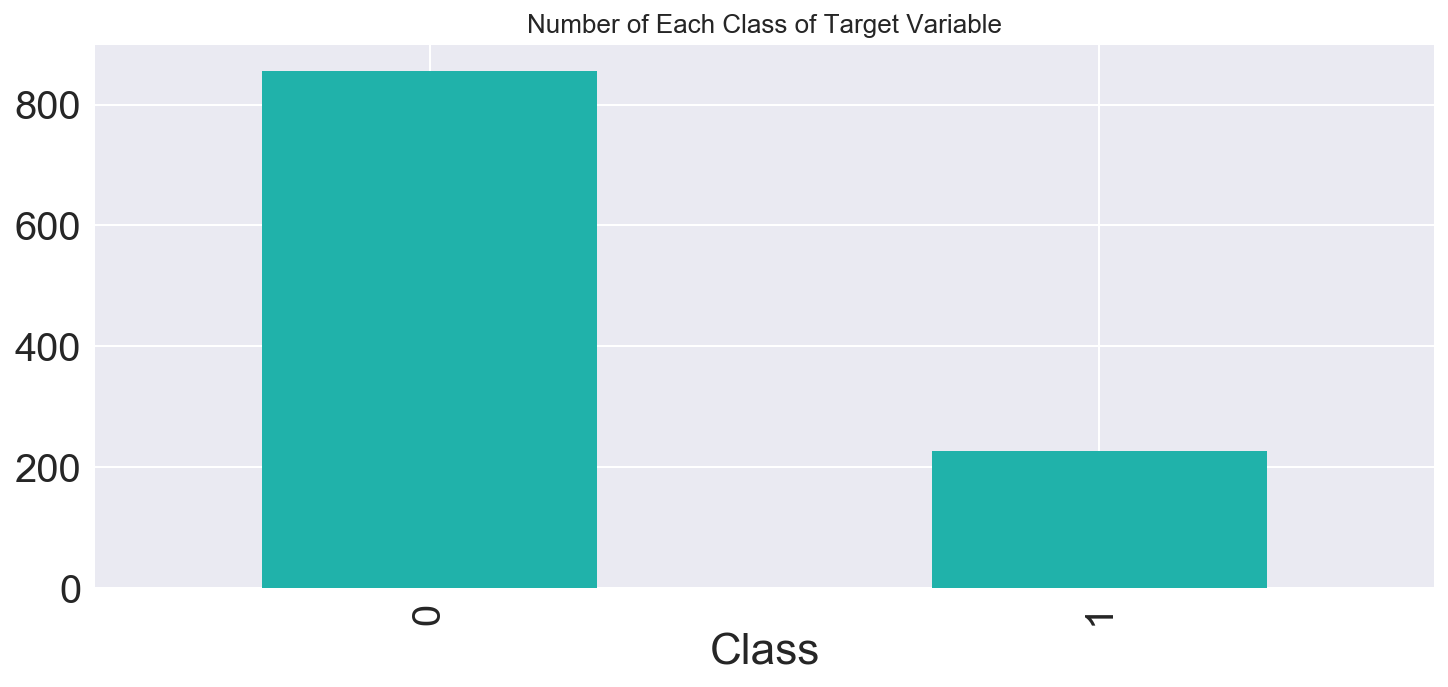

In [5]:
plt.figure(figsize=(12, 5))

a = df["label"]
a = a.value_counts()
a.plot(kind='bar', color="lightseagreen")
plt.title("Number of Each Class of Target Variable", fontsize=13)
plt.xlabel("Class")

plt.show()

# Single Count

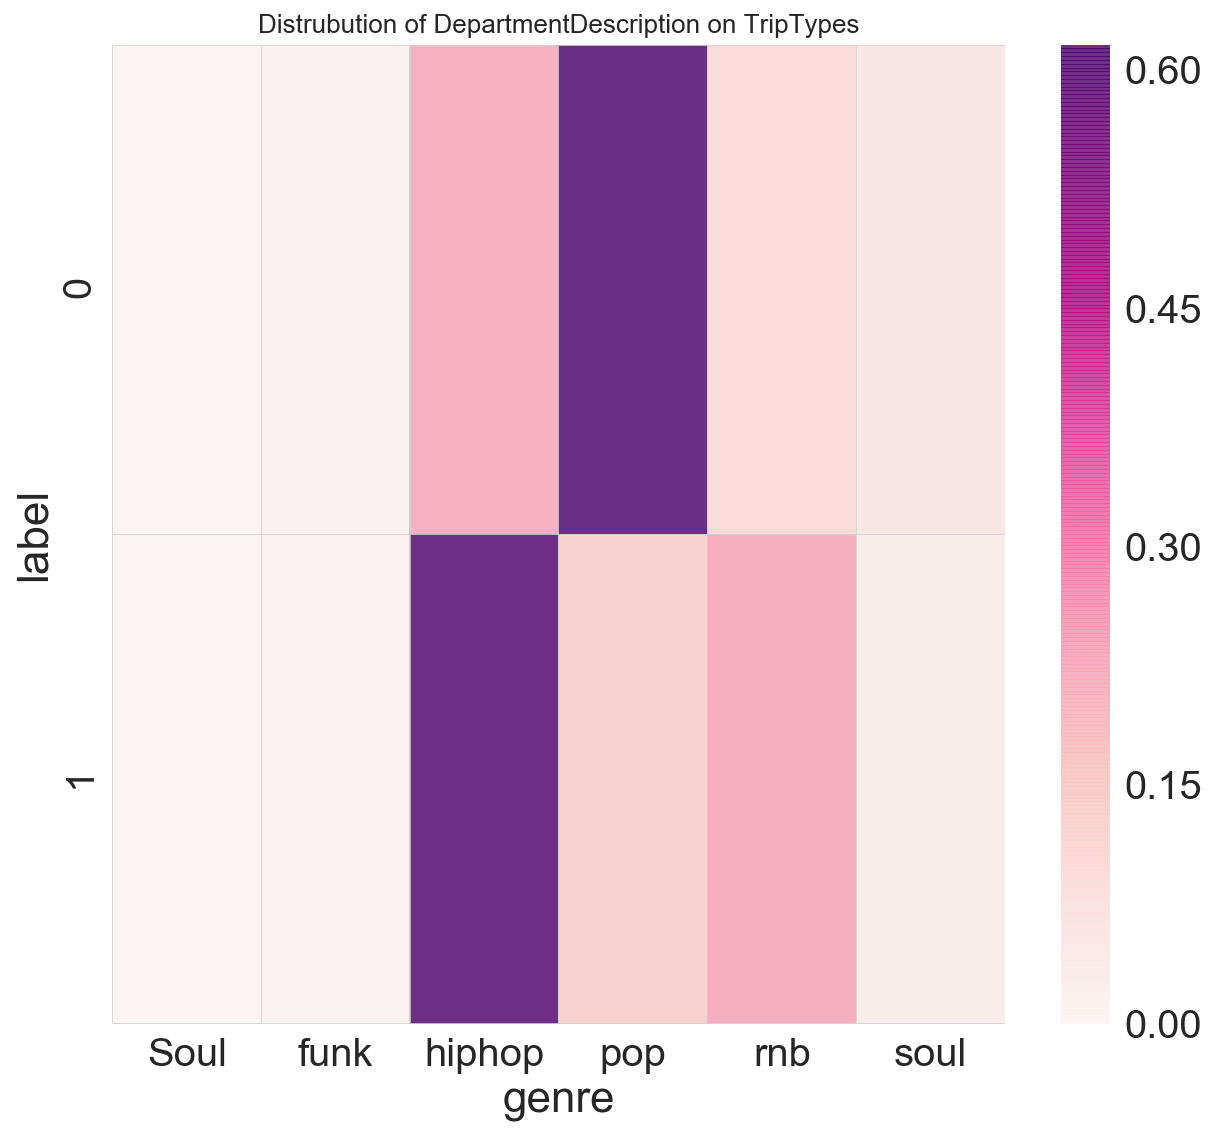

In [24]:
tmp = pd.crosstab(df["label"], 
                df["genre"], 
                values=df["single_count"], 
                aggfunc="count",
                normalize="index"
                )

plt.figure(figsize=(10, 9))
sns.heatmap(tmp, linecolor="lightgrey", linewidths=0.02, cmap="RdPu", alpha=.8)
plt.title("Distrubution of DepartmentDescription on TripTypes", fontsize=13)
plt.show()

# Buzz Frequency

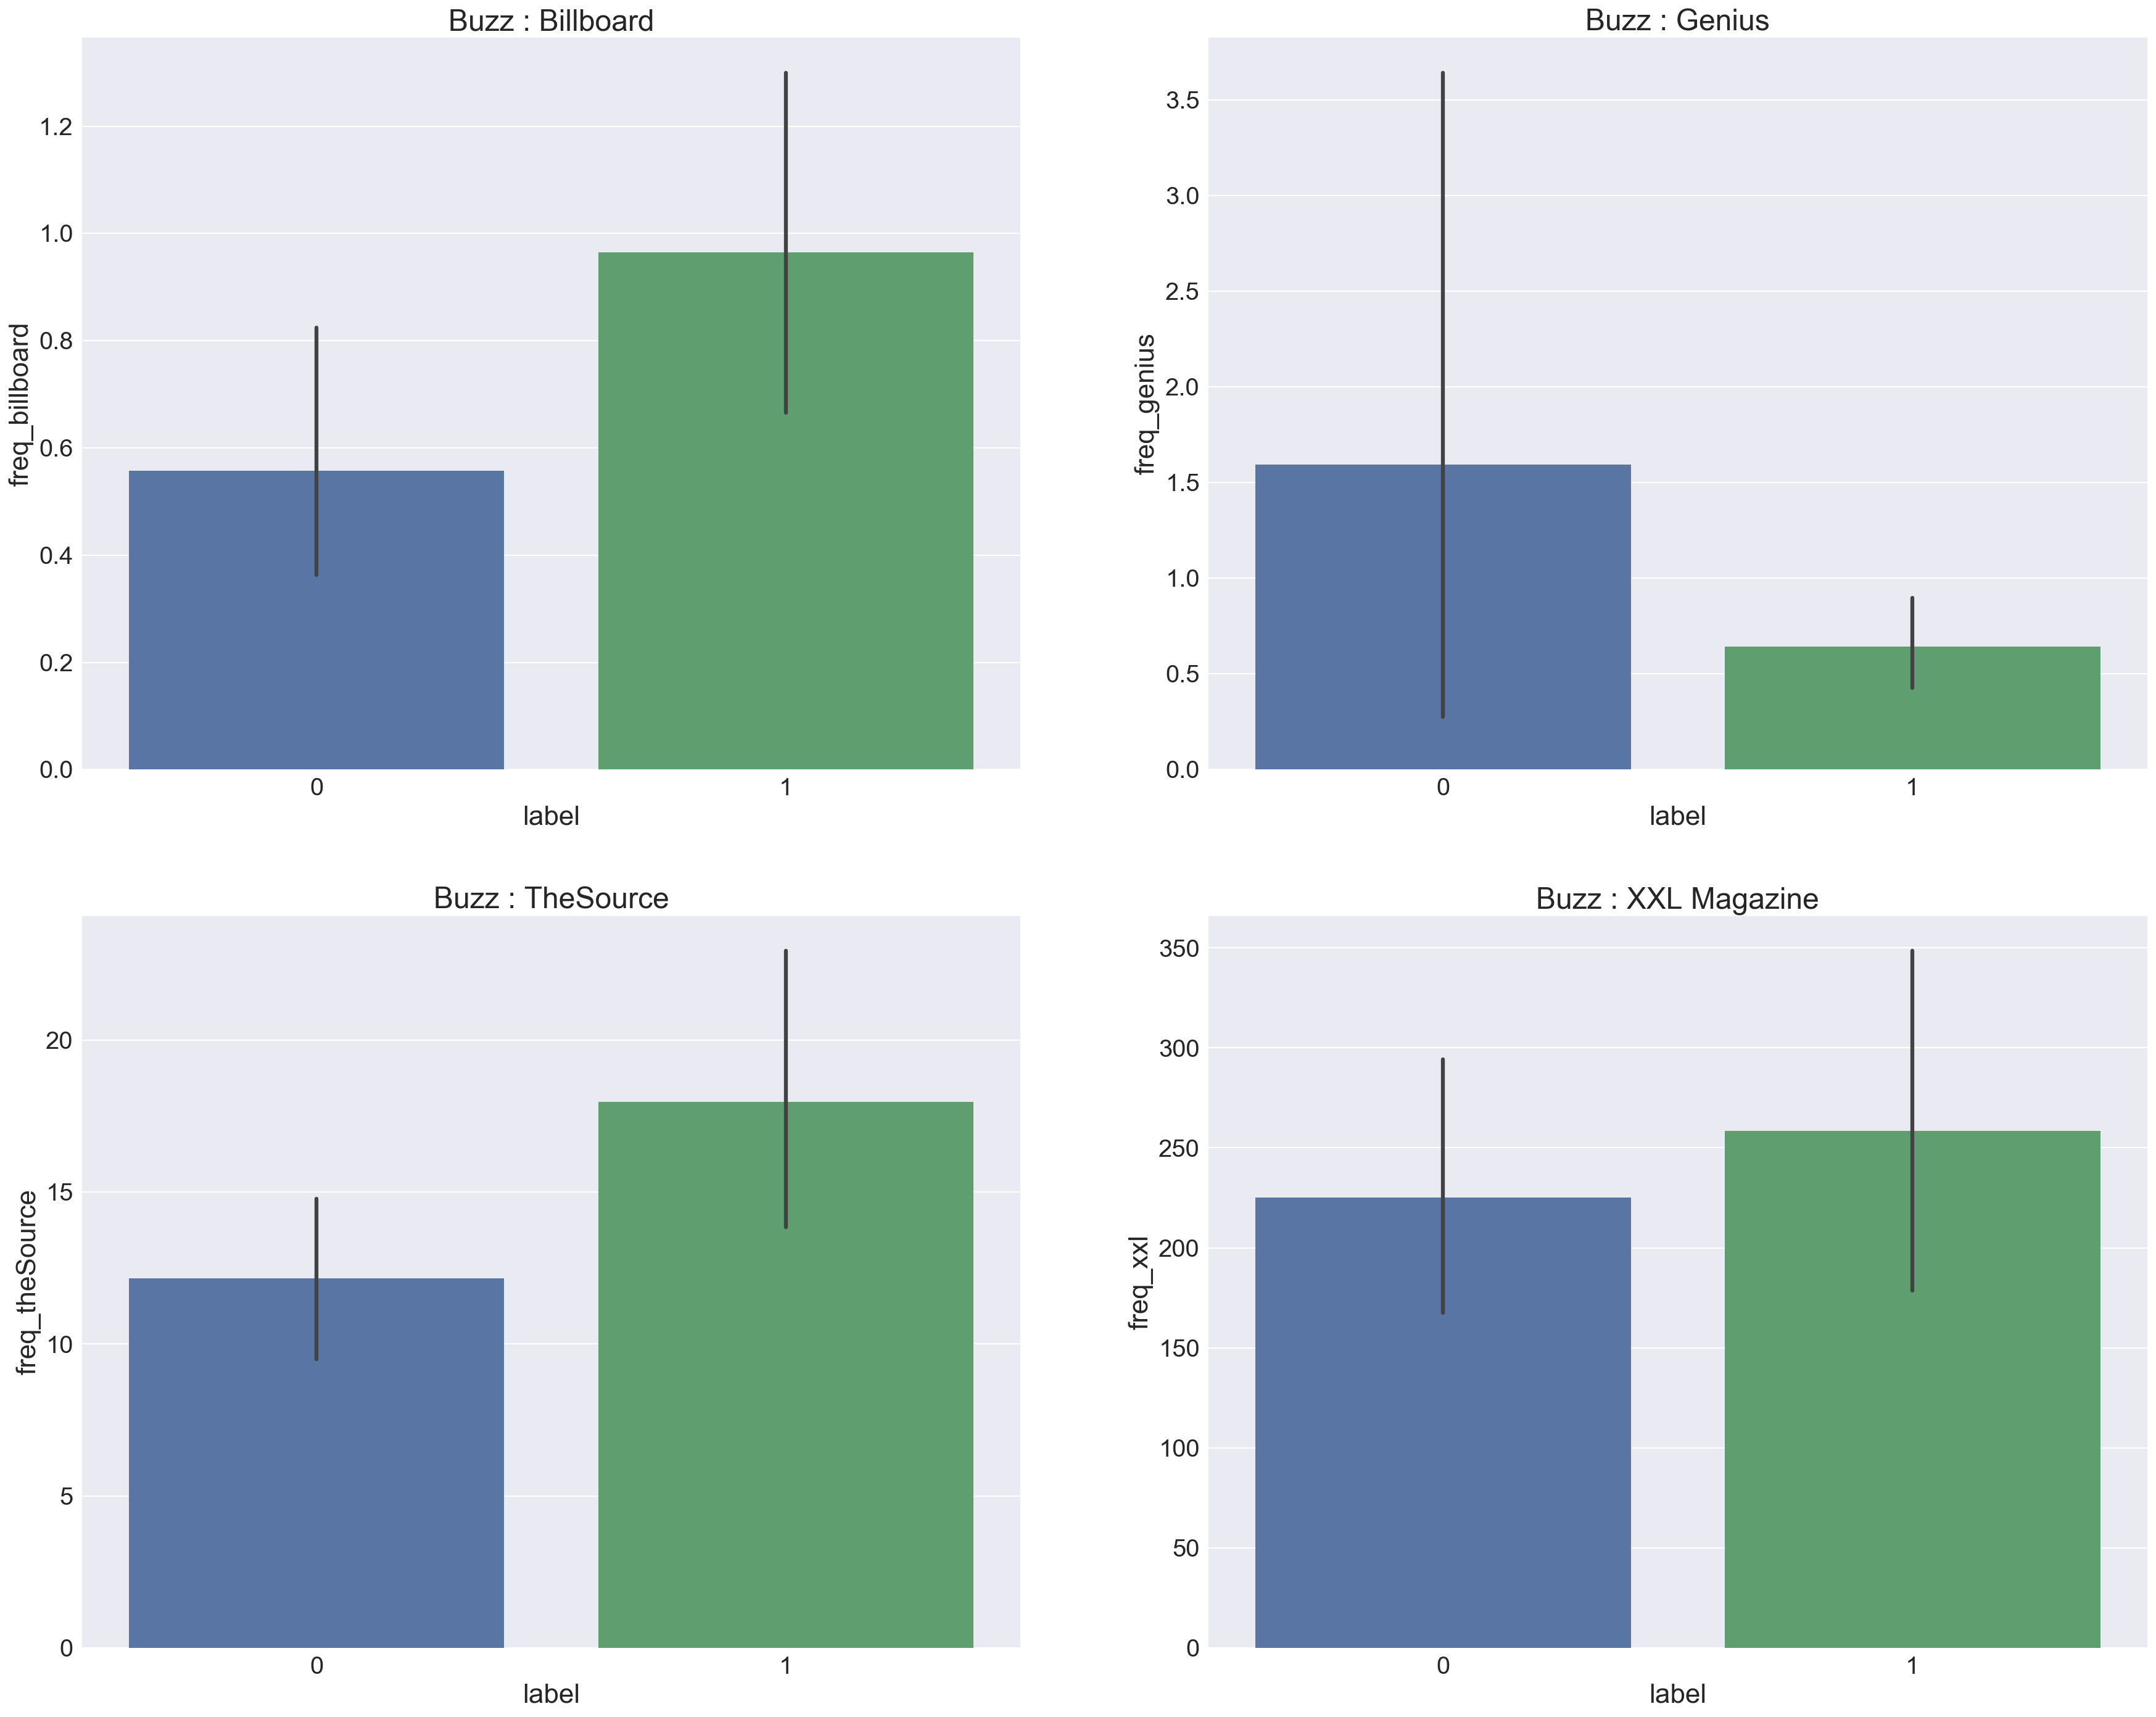

In [25]:
fig = plt.figure(figsize=(30, 24))

ax1 = fig.add_subplot(221)
sns.barplot(x="label", y="freq_billboard", data=df,).set_title("Buzz : Billboard")

ax2 = fig.add_subplot(222)
sns.barplot(x="label", y="freq_genius", data=df).set_title("Buzz : Genius")

ax3 = fig.add_subplot(223)
sns.barplot(x="label", y="freq_theSource", data=df).set_title("Buzz : TheSource")

ax4 = fig.add_subplot(224)
sns.barplot(x="label", y="freq_xxl", data=df).set_title("Buzz : XXL Magazine")

plt.show()

In [35]:
df = df.fillna(value=0)

In [36]:
df.columns

Index(['label', 'artist', 'album', 'genre', 'single_count', 'freq_billboard',
       'freq_genius', 'freq_theSource', 'freq_xxl', 'rating_AOTY',
       'rating_meta', 'rating_pitch', 'twitter', 'instagram', 'facebook',
       'spotify', 'soundcloud', 'youtube'],
      dtype='object')

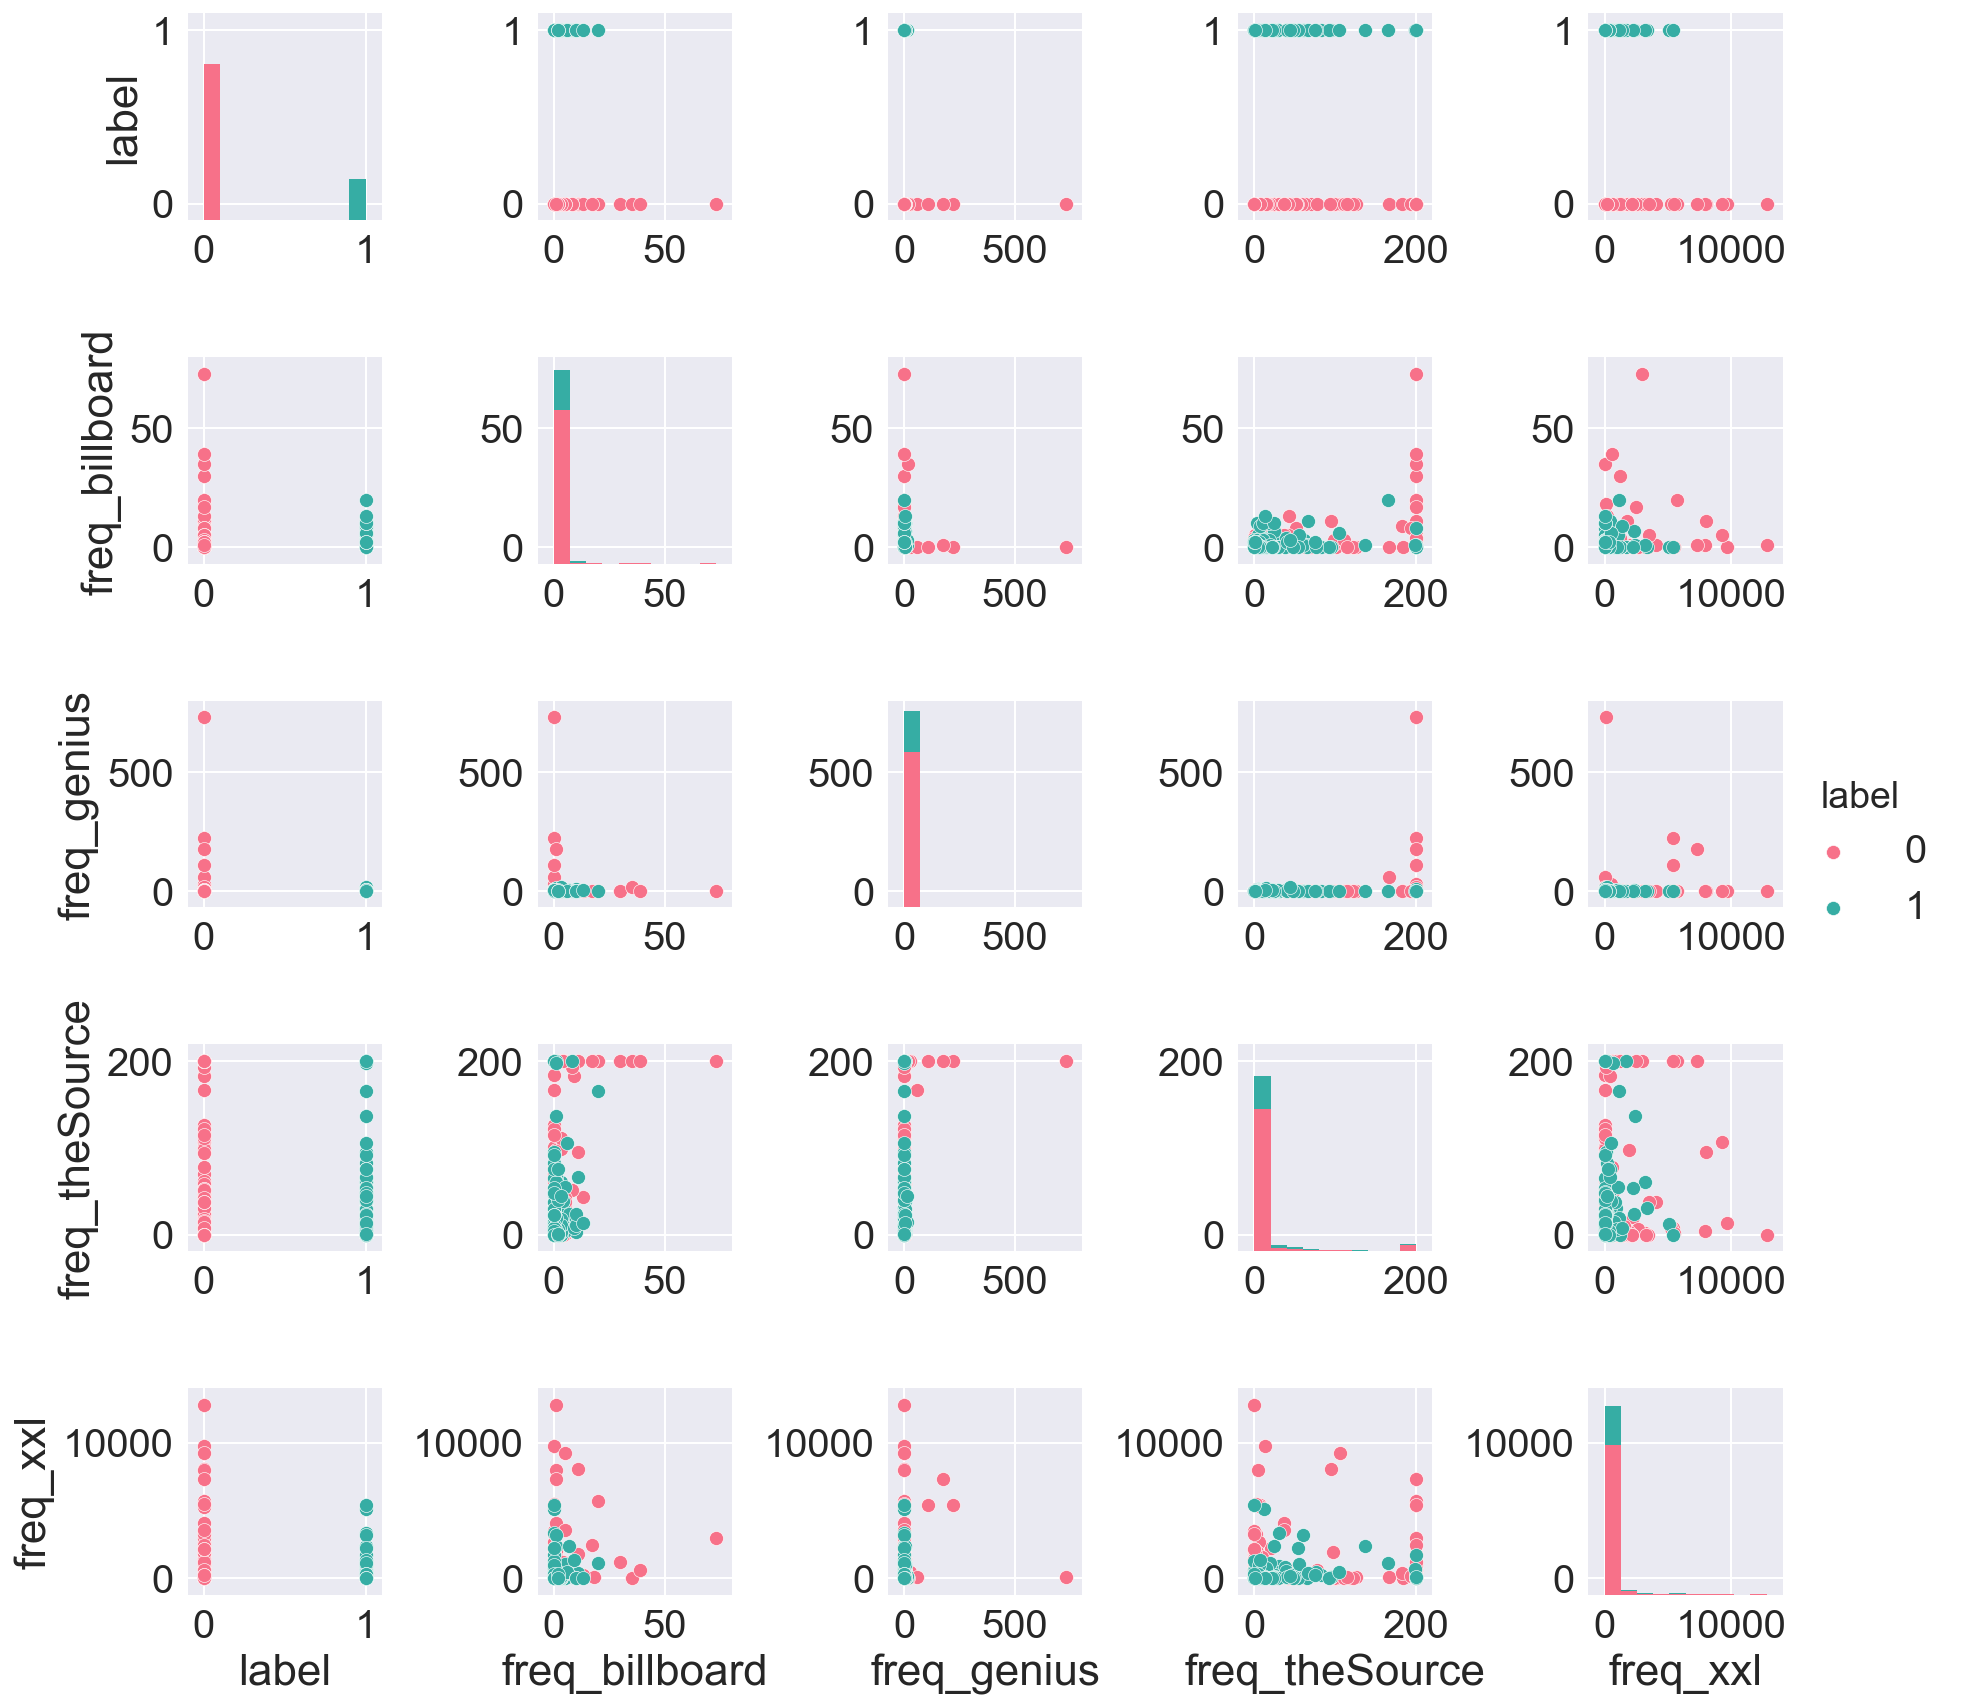

In [64]:
tmp_freq = df[['label','freq_billboard','freq_genius', 'freq_theSource', 'freq_xxl']].copy()

sns.pairplot(tmp_freq, hue="label", palette="husl")

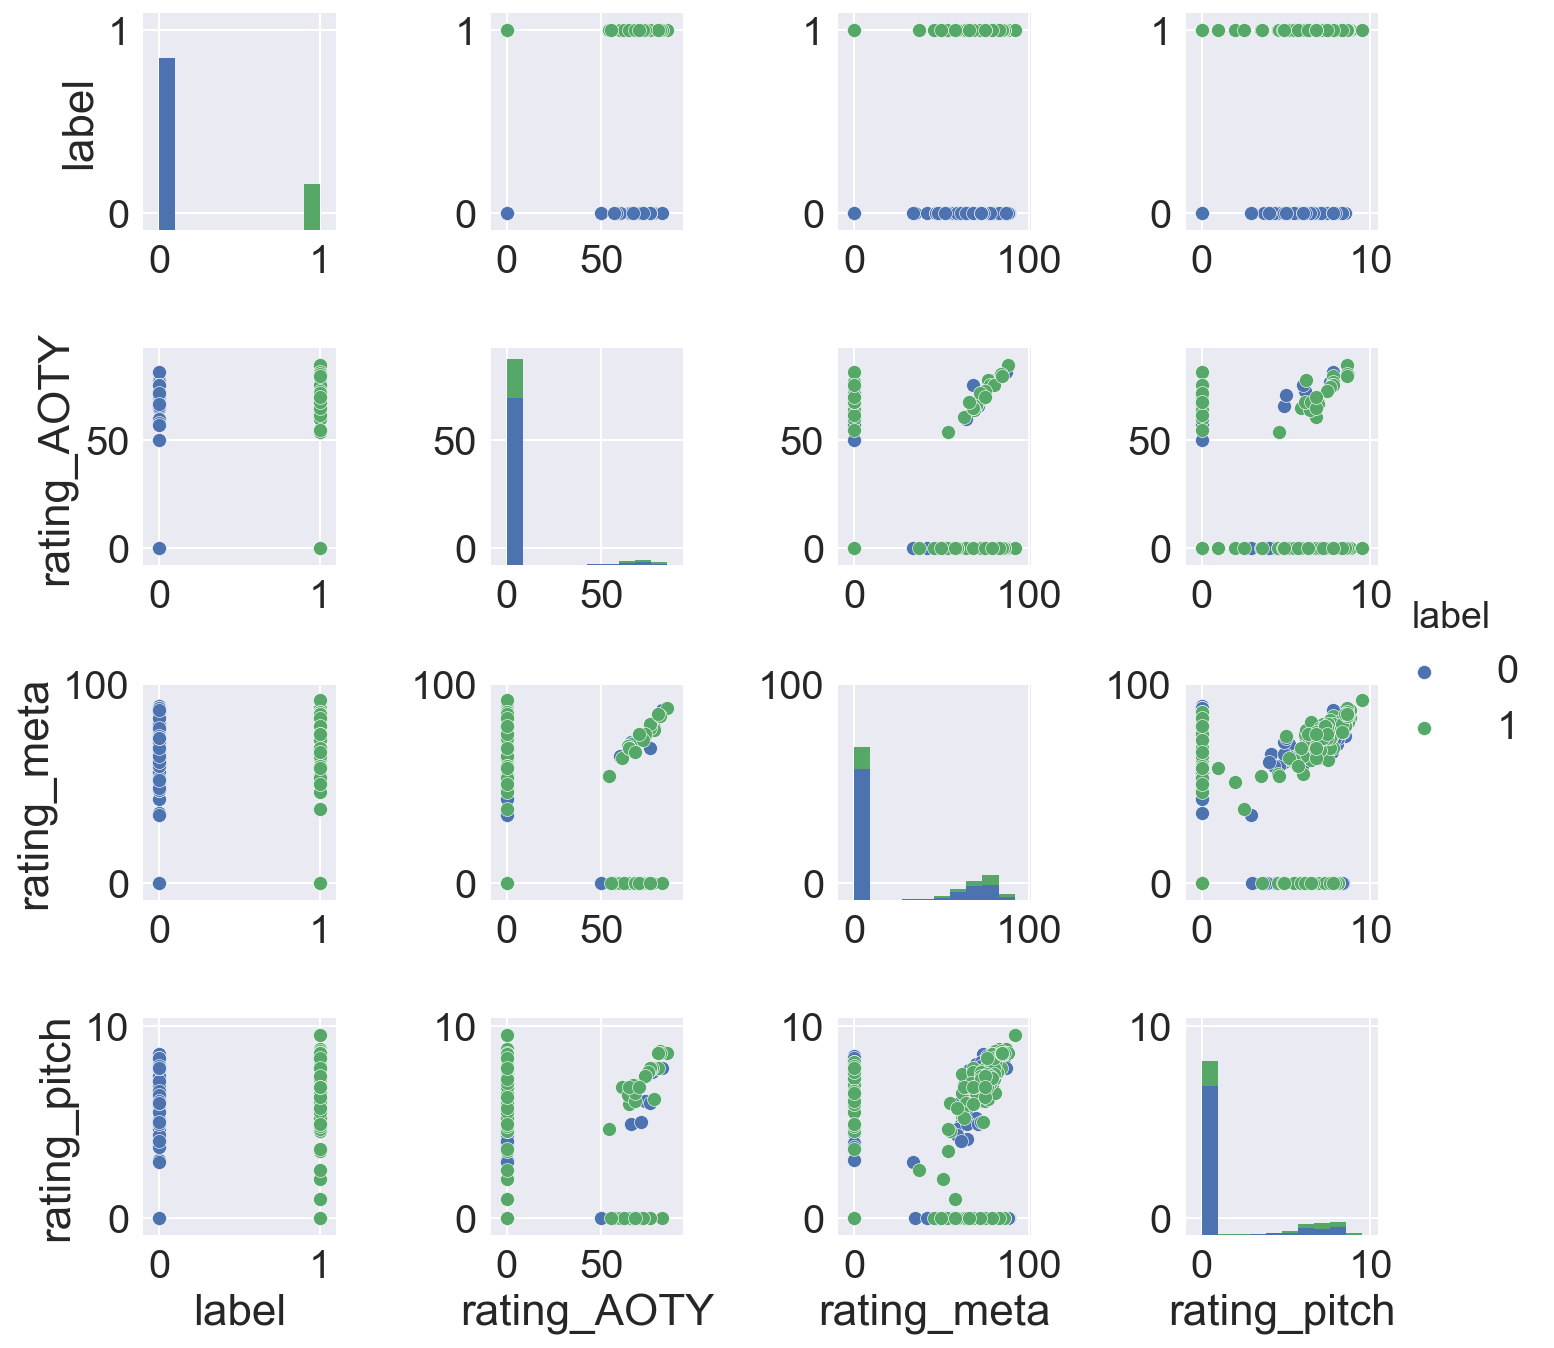

In [63]:
tmp_rating = df[['label','rating_AOTY','rating_meta', 'rating_pitch',]].copy()

sns.pairplot(tmp_rating, hue="label")

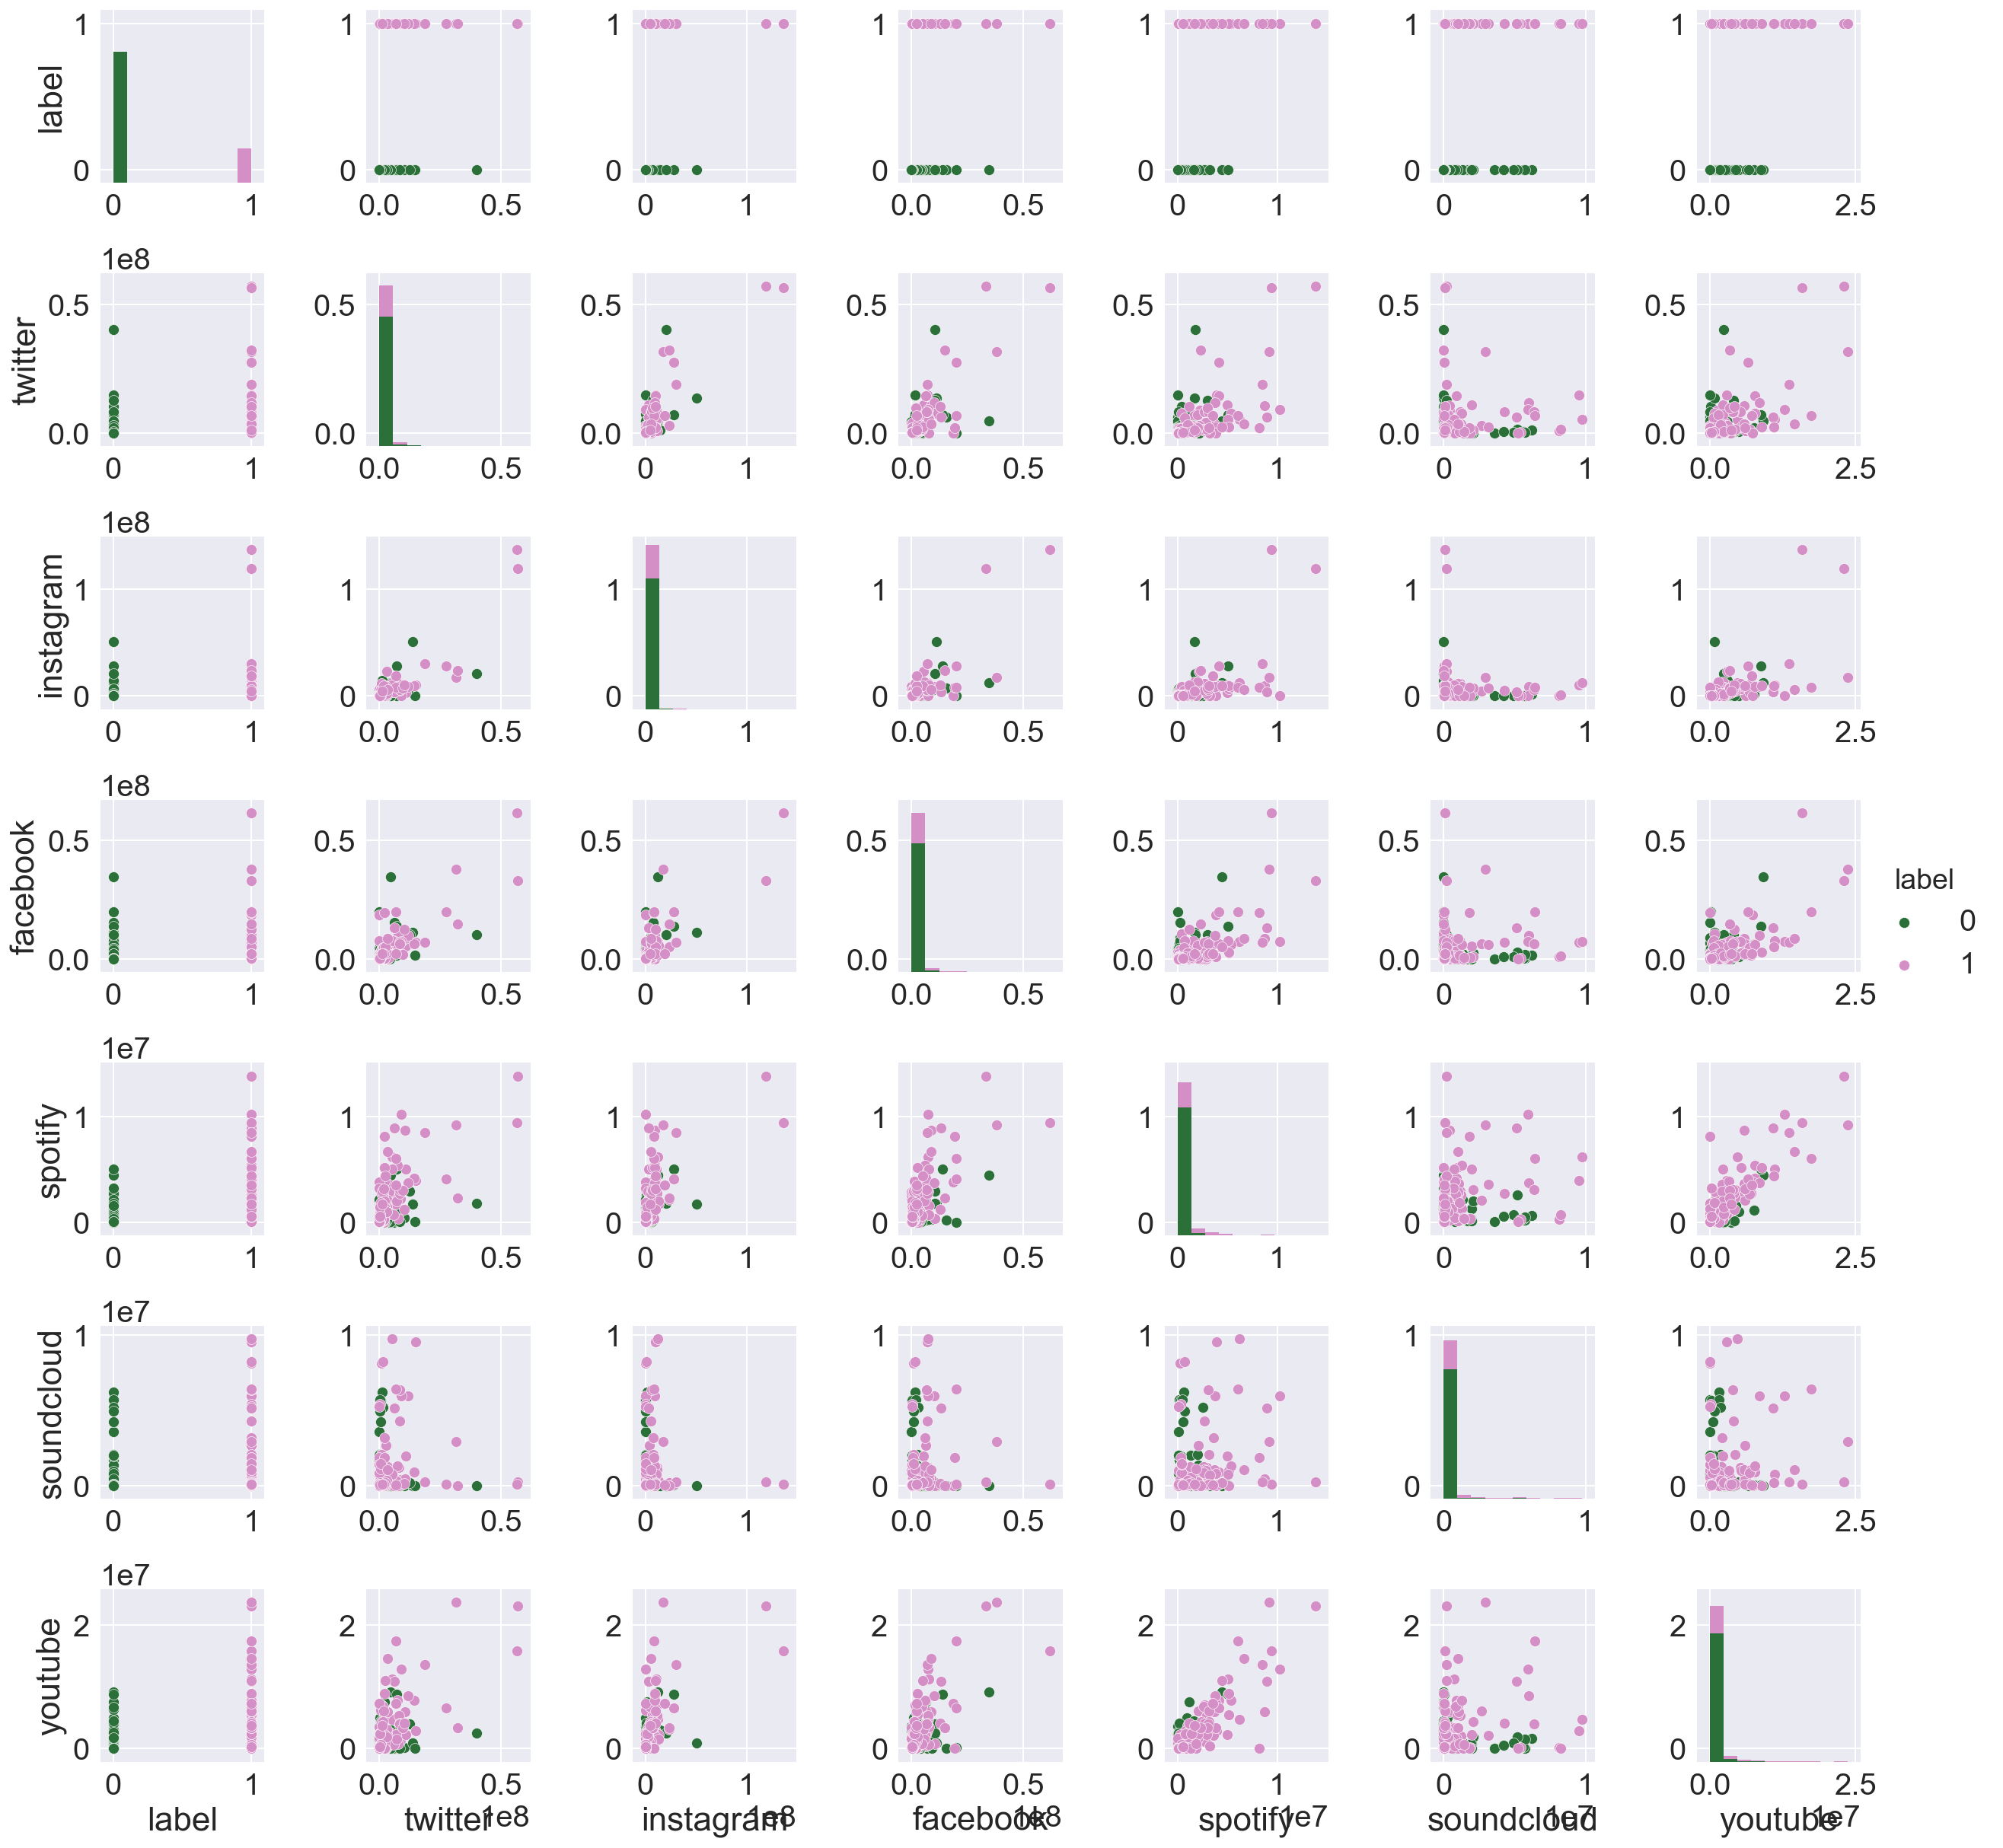

In [59]:
tmp_sns = df[['label','twitter', 'instagram', 'facebook','spotify', 'soundcloud', 'youtube']].copy()

sns.pairplot(tmp_sns, hue="label", palette="cubehelix")

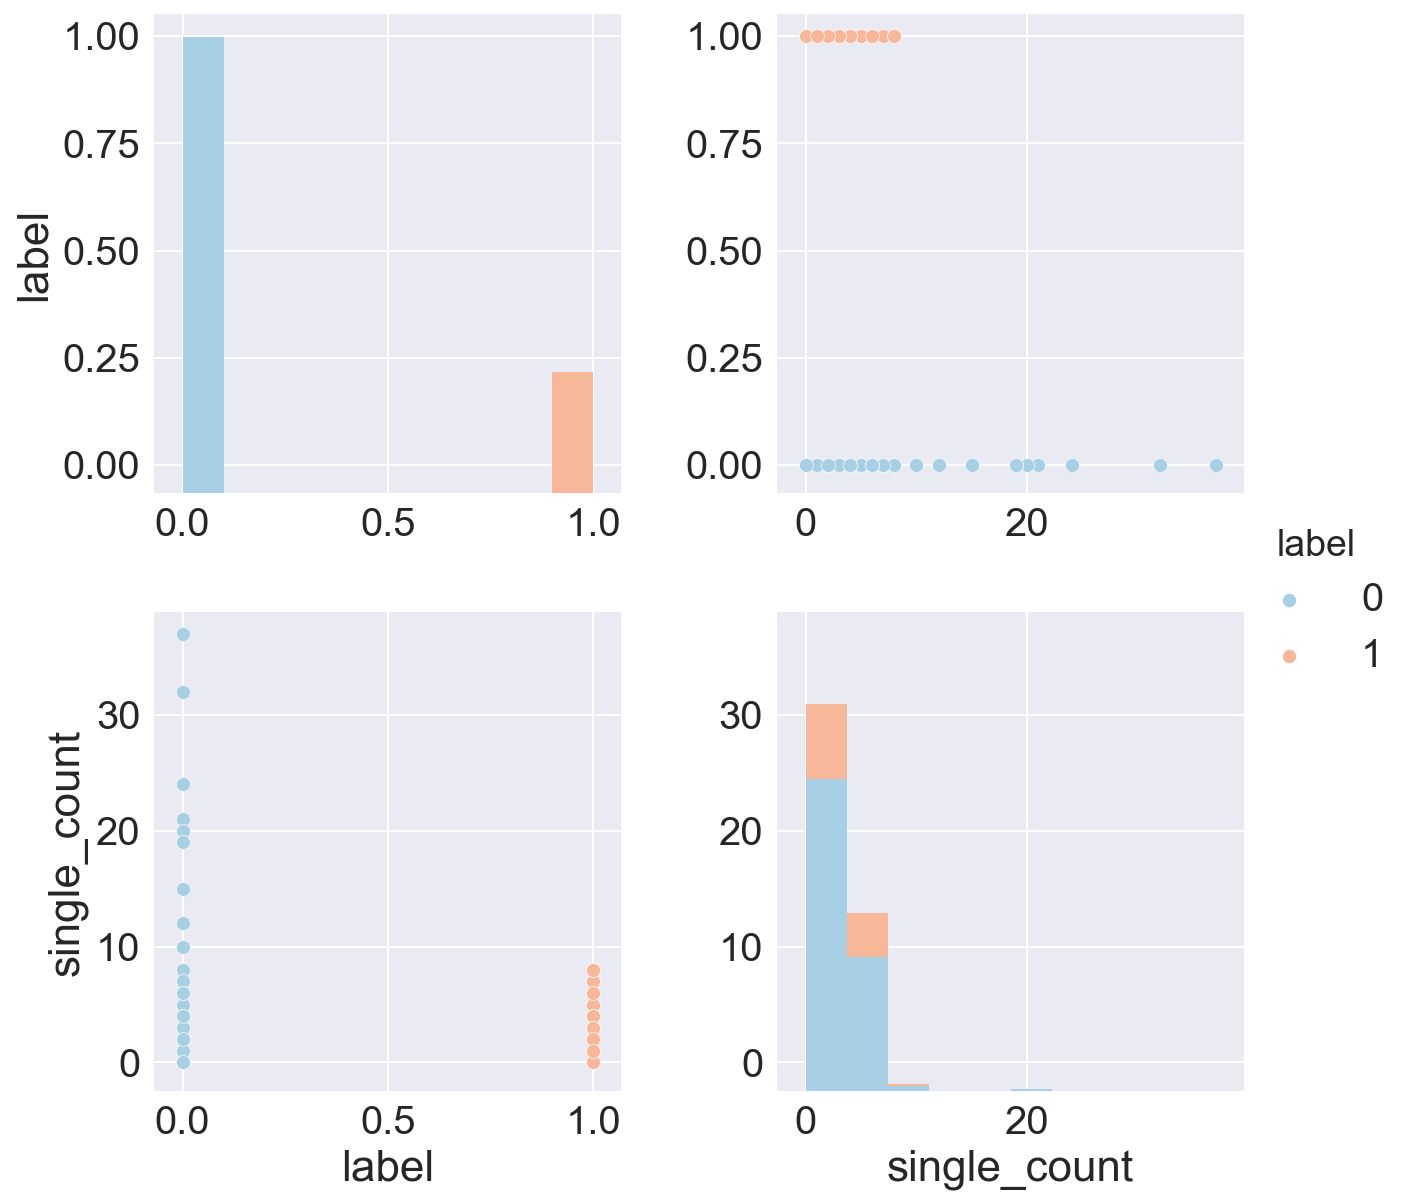

In [61]:
tmp_album = df[['label','single_count', 'genre']].copy()

sns.pairplot(tmp_album, hue="label", size=4.5, palette="RdBu_r")